# Task - 3



## **Task has been mentioned at the end of this notebook**  

## 1. Basic Pandas Operations

In [1]:
# Import all the required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve,roc_auc_score
from sklearn.metrics import classification_report

In [2]:
# Read the dataset and display the head. You will get the output as mentioned below

df=pd.read_csv(r"C:\Users\Lenovo\classfiles\Machine learning\train.csv")
df.head()

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,Owned,Individual,36,36,No,X1,14+,2.0,16,13320.0,0
1,33499,33500,C3,2955,Owned,Individual,66,66,No,X6,10,1.0,19,16152.0,0
2,7997,7998,C1,1542,Rented,Individual,24,24,No,NaN,3,1.0,16,7310.0,0
3,33032,33033,C26,772,Rented,Individual,75,75,No,X1,1,3.0,16,15792.0,0
4,30516,30517,C2,1510,Owned,Joint,59,58,Yes,X1,14+,4.0,17,23673.0,0


In [3]:
# Check the shape of the dataframe

df.shape

(10000, 15)

In [4]:
# On the dataframe apply info() function and observe the Dtypes and Missing Values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  object 
 5   Reco_Insurance_Type      10000 non-null  object 
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  object 
 9   Health Indicator         7671 non-null   object 
 10  Holding_Policy_Duration  5946 non-null   object 
 11  Holding_Policy_Type      5946 non-null   float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

In [5]:
df.isna().sum()

Unnamed: 0                    0
ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           2329
Holding_Policy_Duration    4054
Holding_Policy_Type        4054
Reco_Policy_Cat               0
Reco_Policy_Premium           0
Response                      0
dtype: int64

## 2. Cleaning the Data

In [6]:
# Impute the Null values in Health Indicator, Holding_Policy_Duration and Holding_Policy_Type

df['Holding_Policy_Type'].fillna(df['Holding_Policy_Type'].mean(), inplace = True)
df['Holding_Policy_Duration'].fillna(df['Holding_Policy_Duration'].mode()[0], inplace = True) 
df['Health Indicator'].fillna(df['Health Indicator'].mode()[0], inplace = True)
print(df.isnull().sum())

Unnamed: 0                 0
ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64


In [7]:
# Check again Holding_Policy_Duration is in object column convert that into int


df['Holding_Policy_Duration'].value_counts()

14+    4952
1       867
2       790
3       696
4       530
5       461
6       374
7       320
8       254
9       205
10      166
12      104
13      103
11       89
14       89
Name: Holding_Policy_Duration, dtype: int64

In [8]:
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].replace(['1','2','3','4','5','6','7','8','9','10','11','12','13','14'],'14-')
df['Holding_Policy_Duration'].value_counts()

14-    5048
14+    4952
Name: Holding_Policy_Duration, dtype: int64

In [9]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
df['Holding_Policy_Duration'] = label_encoder.fit_transform(df['Holding_Policy_Duration'])
df['Holding_Policy_Duration'].unique()

array([0, 1])

In [10]:
# Observe that ['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'] 
# above these Object columns have two values - Yes and No

print(df['Accomodation_Type'].head())
print(df['Reco_Insurance_Type'].head())
print(df['Is_Spouse'].head())

0     Owned
1     Owned
2    Rented
3    Rented
4     Owned
Name: Accomodation_Type, dtype: object
0    Individual
1    Individual
2    Individual
3    Individual
4         Joint
Name: Reco_Insurance_Type, dtype: object
0     No
1     No
2     No
3     No
4    Yes
Name: Is_Spouse, dtype: object


In [11]:
# Converting all the Yes to 1 and No to 0. 



# Write a for loop to iterate over the list given above
# For each feature use pandas 'apply()' to convert all the 'Yes' to 1 and 'No' to 0

%timeit
df['Is_Spouse']=df['Is_Spouse'].apply(lambda x:0 if x=='No' else 1)


    


In [12]:
%timeit
df['Accomodation_Type']=df['Accomodation_Type'].apply(lambda x:0 if x=='Rented' else 1)
df['Accomodation_Type']

0       1
1       1
2       0
3       0
4       1
       ..
9995    1
9996    0
9997    1
9998    0
9999    1
Name: Accomodation_Type, Length: 10000, dtype: int64

In [13]:
%timeit
df['Reco_Insurance_Type']=df['Reco_Insurance_Type'].apply(lambda x:0 if x=='Joint' else 1)
df['Reco_Insurance_Type']

0       1
1       1
2       1
3       1
4       0
       ..
9995    0
9996    1
9997    1
9998    1
9999    0
Name: Reco_Insurance_Type, Length: 10000, dtype: int64

In [14]:
# Now again having a look at all those columns to see if everything went well

df.head()

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,1,1,36,36,0,X1,0,2.0,16,13320.0,0
1,33499,33500,C3,2955,1,1,66,66,0,X6,1,1.0,19,16152.0,0
2,7997,7998,C1,1542,0,1,24,24,0,X1,1,1.0,16,7310.0,0
3,33032,33033,C26,772,0,1,75,75,0,X1,1,3.0,16,15792.0,0
4,30516,30517,C2,1510,1,0,59,58,1,X1,0,4.0,17,23673.0,0


In [15]:
# Observe that all those columns are now converted from Object to Int64

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  int64  
 5   Reco_Insurance_Type      10000 non-null  int64  
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  int64  
 9   Health Indicator         10000 non-null  object 
 10  Holding_Policy_Duration  10000 non-null  int32  
 11  Holding_Policy_Type      10000 non-null  float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

In [16]:
# Checking all the Object Dtypes - Here, these columns have more than 2 categories

df['City_Code'].unique()

array(['C3', 'C1', 'C26', 'C2', 'C17', 'C4', 'C16', 'C9', 'C23', 'C21',
       'C6', 'C7', 'C11', 'C22', 'C15', 'C13', 'C8', 'C35', 'C29', 'C33',
       'C10', 'C12', 'C19', 'C5', 'C18', 'C14', 'C24', 'C27', 'C20',
       'C34', 'C36', 'C25', 'C28', 'C32', 'C30', 'C31'], dtype=object)

In [17]:
df['Health Indicator'].unique()

array(['X1', 'X6', 'X4', 'X2', 'X3', 'X5', 'X8', 'X7', 'X9'], dtype=object)

In [18]:
# You can also do this to separate Object columns

df_categorical=df.select_dtypes(include='object')
df_categorical

,City_Code,Health Indicator
0,C3,X1
1,C3,X6
2,C1,X1
3,C26,X1
4,C2,X1
...,...,...
9995,C3,X5
9996,C5,X1
9997,C1,X1
9998,C1,X5


In [19]:
# Lets just try to see what is happening Response. Check the output.

df['Response'].unique()

array([0, 1], dtype=int64)

In [20]:
# Dropping unknown column

# Write the code here to drop unknown column and check dataframe shape
df=df.drop(['Unnamed: 0'], axis=1)
df.head()


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27386,C3,64,1,1,36,36,0,X1,0,2.0,16,13320.0,0
1,33500,C3,2955,1,1,66,66,0,X6,1,1.0,19,16152.0,0
2,7998,C1,1542,0,1,24,24,0,X1,1,1.0,16,7310.0,0
3,33033,C26,772,0,1,75,75,0,X1,1,3.0,16,15792.0,0
4,30517,C2,1510,1,0,59,58,1,X1,0,4.0,17,23673.0,0


In [21]:
df.shape

(10000, 14)

In [22]:
# Getting all the Object Dtypes

print(df_categorical)
print(df_categorical.dtypes)
print(df_categorical.shape)

     City_Code Health Indicator
0           C3               X1
1           C3               X6
2           C1               X1
3          C26               X1
4           C2               X1
...        ...              ...
9995        C3               X5
9996        C5               X1
9997        C1               X1
9998        C1               X5
9999        C7               X2

[10000 rows x 2 columns]
City_Code           object
Health Indicator    object
dtype: object
(10000, 2)


In [23]:
# Encoding the categorical features



# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

# Write the code here to use 'encoder' to convert all the categorical columns to numerical representations
# Take extra care to convert encoded numpy array to dataframe and call that data fram 'df_encoded'

from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
df_encoded=encoder.fit_transform(df_categorical)
df_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
df_encoded=pd.get_dummies(df_categorical,drop_first=True)

In [25]:
df_numerical=df.select_dtypes(include='number')
print(df_numerical.head())
print(df_numerical.shape)

      ID  Region_Code  Accomodation_Type  Reco_Insurance_Type  Upper_Age  \
0  27386           64                  1                    1         36   
1  33500         2955                  1                    1         66   
2   7998         1542                  0                    1         24   
3  33033          772                  0                    1         75   
4  30517         1510                  1                    0         59   

   Lower_Age  Is_Spouse  Holding_Policy_Duration  Holding_Policy_Type  \
0         36          0                        0                  2.0   
1         66          0                        1                  1.0   
2         24          0                        1                  1.0   
3         75          0                        1                  3.0   
4         58          1                        0                  4.0   

   Reco_Policy_Cat  Reco_Policy_Premium  Response  
0               16              13320.0         0  


In [26]:
# Concatinating the original data frame and onehot encoded dataframe

df_main=pd.concat([df_numerical,df_encoded],axis=1)

df_main


,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,...,City_Code_C8,City_Code_C9,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,27386,64,1,1,36,36,0,0,2.000000,16,...,0,0,0,0,0,0,0,0,0,0
1,33500,2955,1,1,66,66,0,1,1.000000,19,...,0,0,0,0,0,0,1,0,0,0
2,7998,1542,0,1,24,24,0,1,1.000000,16,...,0,0,0,0,0,0,0,0,0,0
3,33033,772,0,1,75,75,0,1,3.000000,16,...,0,0,0,0,0,0,0,0,0,0
4,30517,1510,1,0,59,58,1,0,4.000000,17,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5204,13,1,0,47,40,1,0,2.431719,19,...,0,0,0,0,0,1,0,0,0,0
9996,35449,1477,0,1,34,34,0,1,1.000000,4,...,0,0,0,0,0,0,0,0,0,0
9997,47254,2357,1,1,64,64,0,1,2.000000,19,...,0,0,0,0,0,0,0,0,0,0
9998,42545,1443,0,1,53,53,0,0,3.000000,13,...,0,0,0,0,0,1,0,0,0,0


In [27]:
df_main.columns

Index(['ID', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Response', 'City_Code_C10', 'City_Code_C11', 'City_Code_C12',
       'City_Code_C13', 'City_Code_C14', 'City_Code_C15', 'City_Code_C16',
       'City_Code_C17', 'City_Code_C18', 'City_Code_C19', 'City_Code_C2',
       'City_Code_C20', 'City_Code_C21', 'City_Code_C22', 'City_Code_C23',
       'City_Code_C24', 'City_Code_C25', 'City_Code_C26', 'City_Code_C27',
       'City_Code_C28', 'City_Code_C29', 'City_Code_C3', 'City_Code_C30',
       'City_Code_C31', 'City_Code_C32', 'City_Code_C33', 'City_Code_C34',
       'City_Code_C35', 'City_Code_C36', 'City_Code_C4', 'City_Code_C5',
       'City_Code_C6', 'City_Code_C7', 'City_Code_C8', 'City_Code_C9',
       'Health Indicator_X2', 'Health Indicator_X3', 'Health Indicator_X4',
       'Health Indicator_X5', 'Health Indicat

In [28]:
# Drop all the unwanted columns.
df_final = df_main.drop(['ID'],axis=1)


# Because we have already encoded them and added to main dataframe



## Observe that 26.5% datapoints belong to one class rest all belongs to other class. Clearly dataset is having high imbalance.

**To Do:**
1. Read about Oversampling and Undersampling.
2. Perform undersampling.

In [29]:
# Find Number of samples having one as response

one_response = len(df_final[df_final['Response'] == 1])
print(one_response)



2459


In [30]:
# Get indices having zero as response

zero_response_indices = df_final[df_final['Response'] == 0].index
print(zero_response_indices)


Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,   10,
            ...
            9986, 9987, 9989, 9992, 9993, 9994, 9996, 9997, 9998, 9999],
           dtype='int64', length=7541)


In [31]:
# Random samples of zero indices

random_indices = np.random.choice(zero_response_indices, one_response, replace = False)
print(random_indices)


[6201 7201 2225 ... 6290 2290 7661]


In [32]:
# Find the indices of response having one 

response_indices = df_final[df_final['Response'] == 1].index
print(response_indices)


Int64Index([   9,   12,   21,   22,   34,   39,   40,   41,   42,   56,
            ...
            9955, 9959, 9968, 9975, 9980, 9983, 9988, 9990, 9991, 9995],
           dtype='int64', length=2459)


In [33]:
# Concat response_indices with random_indices

under_sample_indices = np.concatenate([response_indices, random_indices])
print(under_sample_indices)


[   9   12   21 ... 6290 2290 7661]


In [34]:
# Get Balance Dataframe

under_sample = df_final.loc[under_sample_indices]
print(under_sample.head())


    Region_Code  Accomodation_Type  Reco_Insurance_Type  Upper_Age  Lower_Age  \
9          3377                  0                    1         30         30   
12         5029                  1                    1         73         73   
21          573                  1                    1         35         35   
22          849                  1                    1         42         42   
34           71                  1                    1         36         36   

    Is_Spouse  Holding_Policy_Duration  Holding_Policy_Type  Reco_Policy_Cat  \
9           0                        0             2.431719               13   
12          0                        1             3.000000               15   
21          0                        1             3.000000               15   
22          0                        1             4.000000               22   
34          0                        1             1.000000               16   

    Reco_Policy_Premium  ...  Ci

<AxesSubplot:xlabel='Response', ylabel='count'>

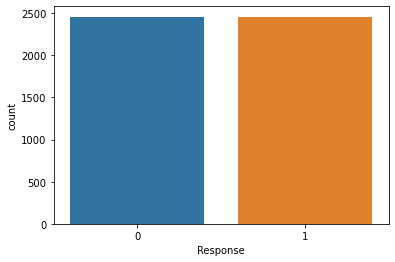

In [35]:
# Visualising Undersampled Data

sns.countplot(x = under_sample['Response'], data = under_sample)

In [36]:
under_sample.shape
under_sample.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4918 entries, 9 to 7661
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Region_Code              4918 non-null   int64  
 1   Accomodation_Type        4918 non-null   int64  
 2   Reco_Insurance_Type      4918 non-null   int64  
 3   Upper_Age                4918 non-null   int64  
 4   Lower_Age                4918 non-null   int64  
 5   Is_Spouse                4918 non-null   int64  
 6   Holding_Policy_Duration  4918 non-null   int32  
 7   Holding_Policy_Type      4918 non-null   float64
 8   Reco_Policy_Cat          4918 non-null   int64  
 9   Reco_Policy_Premium      4918 non-null   float64
 10  Response                 4918 non-null   int64  
 11  City_Code_C10            4918 non-null   uint8  
 12  City_Code_C11            4918 non-null   uint8  
 13  City_Code_C12            4918 non-null   uint8  
 14  City_Code_C13           

In [37]:
df_under_sample = pd.get_dummies(under_sample)
df_under_sample.head()
df_under_sample.shape


(4918, 54)

In [38]:
# check all the columns of the encoded dataframe

df_under_sample.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4918 entries, 9 to 7661
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Region_Code              4918 non-null   int64  
 1   Accomodation_Type        4918 non-null   int64  
 2   Reco_Insurance_Type      4918 non-null   int64  
 3   Upper_Age                4918 non-null   int64  
 4   Lower_Age                4918 non-null   int64  
 5   Is_Spouse                4918 non-null   int64  
 6   Holding_Policy_Duration  4918 non-null   int32  
 7   Holding_Policy_Type      4918 non-null   float64
 8   Reco_Policy_Cat          4918 non-null   int64  
 9   Reco_Policy_Premium      4918 non-null   float64
 10  Response                 4918 non-null   int64  
 11  City_Code_C10            4918 non-null   uint8  
 12  City_Code_C11            4918 non-null   uint8  
 13  City_Code_C12            4918 non-null   uint8  
 14  City_Code_C13           

In [39]:
# Drop all the unwanted columns.


# Because we have already encoded them and added to main dataframe

df_under_sample.drop(['City_Code_C10', 'City_Code_C11',
       'City_Code_C12', 'City_Code_C13', 'City_Code_C14', 'City_Code_C15',
       'City_Code_C16', 'City_Code_C17', 'City_Code_C18', 'City_Code_C19',
       'City_Code_C2', 'City_Code_C20', 'City_Code_C21', 'City_Code_C22',
       'City_Code_C23', 'City_Code_C24', 'City_Code_C25', 'City_Code_C26',
       'City_Code_C27', 'City_Code_C28', 'City_Code_C29', 'City_Code_C3',
       'City_Code_C30', 'City_Code_C31', 'City_Code_C32', 'City_Code_C33',
       'City_Code_C34', 'City_Code_C35', 'City_Code_C36', 'City_Code_C4',
       'City_Code_C5', 'City_Code_C6', 'City_Code_C7', 'City_Code_C8',
       'City_Code_C9'], axis = 1, inplace = True)
df_under_sample.shape

(4918, 19)

## Train Test Split

**To Do:**
1. Sandardise the data
2. Perform 80-20 split

In [40]:
X = df_under_sample.loc[:,df_under_sample.columns != 'Response']
y = df_under_sample.loc[:,df_under_sample.columns == 'Response']

# Standardize the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3442, 18) (1476, 18) (3442, 1) (1476, 1)


## Model Building - Logistic Regression, SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Train the Model using `Accuracy` as the evaluation metric
2. Predict
3. Evaluate use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance
4. Compare the perormance of all the models

## 1.Logistic Regression

In [41]:
# Logistic Regression Classifier

classifier_1 = LogisticRegression(random_state=0, solver="liblinear")
classifier_1.fit(X_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [42]:
# parameters
classifier_1.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [43]:

#  Predict
y_pred_logi = classifier_1.predict(X_test)

# Generate predictions
predictions_logi_train =classifier_1.predict(X_train)
predictions_logi_test= classifier_1.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_1=classifier_1.score(X_train,y_train) 
print('Train_Score : ',train_Acc_1*100)

#ACCURACY = TEST DATA SCORE 
Acc_1=classifier_1.score(X_test, y_test)
print('Test_Score : ',Acc_1*100)




Train_Score :  54.35793143521208
Test_Score :  53.04878048780488


confusion_matrix is : 
[[349 361]
 [332 434]]
Accuracy score: 53.04878048780488
Precision score: 54.59119496855346
Recall score: 56.6579634464752
F1 score: 55.605381165919276
roc_auc_score_1 :  52.906446511969996
classification_report is : 
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       710
           1       0.55      0.57      0.56       766

    accuracy                           0.53      1476
   macro avg       0.53      0.53      0.53      1476
weighted avg       0.53      0.53      0.53      1476

[0.        0.5025729 1.       ] [0.         0.59125812 1.        ] [2 1 0]
[0.        0.5084507 1.       ] [0.         0.56657963 1.        ] [2 1 0]
Train AUC: 0.544
Test AUC: 0.529


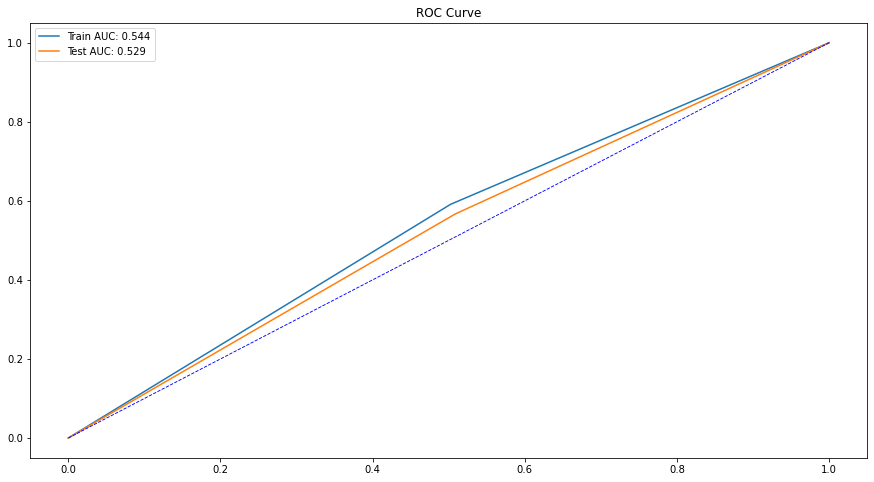

In [44]:
#  Confusion Matrix
print('confusion_matrix is : ')
cm_1= metrics.confusion_matrix(y_test, y_pred_logi) 
print(cm_1)

print('='*100)

accuracy_1 = metrics.accuracy_score(y_test, y_pred_logi) 
print("Accuracy score:",accuracy_1*100)

precision_1 = metrics.precision_score(y_test, y_pred_logi) 
print("Precision score:",precision_1*100)

recall_1 = metrics.recall_score(y_test, y_pred_logi) 
print("Recall score:",recall_1*100)

f1_1 = metrics.f1_score(y_test,y_pred_logi)
print("F1 score:",f1_1*100)

roc_auc_1 = roc_auc_score(y_test, predictions_logi_test)
print('roc_auc_score_1 : ', roc_auc_1*100)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test, predictions_logi_test))

print('='*100)

# calculate ROC
FPR, TPR, LRM = roc_curve(y_train, predictions_logi_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_logi_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_logi = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_logi)

auc_test_logi = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_logi)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_logi)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_logi)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

## 2.Decision Tree

In [45]:
#  Fit the classifier

classifier_2 = DecisionTreeClassifier(criterion = "entropy", random_state=0)
classifier_2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [46]:
# parameters
classifier_2.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [47]:

# Making predictions on Test data
y_pred_dtr= classifier_2.predict(X_test)

# Generate predictions
predictions_dtr_train =classifier_2.predict(X_train)
predictions_dtr_test= classifier_2.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_2=classifier_2.score(X_train,y_train)          
print('Train_Score : ',train_Acc_2*100)

#ACCURACY = TEST DATA SCORE 
Acc_2=classifier_2.score(X_test, y_test)  
print('Test_Score : ',Acc_2*100)


Train_Score :  100.0
Test_Score :  54.87804878048781


confusion_matrix is : 
[[402 308]
 [358 408]]
Accuracy score: 54.87804878048781
Precision score: 56.98324022346368
Recall score: 53.26370757180157
F1 score: 55.06072874493927
roc_auc_score_2 :  54.94171294083036
classification_report is : 
              precision    recall  f1-score   support

          NO       0.53      0.57      0.55       710
         YES       0.57      0.53      0.55       766

    accuracy                           0.55      1476
   macro avg       0.55      0.55      0.55      1476
weighted avg       0.55      0.55      0.55      1476

[0. 0. 1.] [0. 1. 1.] [2 1 0]
[0.         0.43380282 1.        ] [0.         0.53263708 1.        ] [2 1 0]
Train AUC: 1.000
Test AUC: 0.549


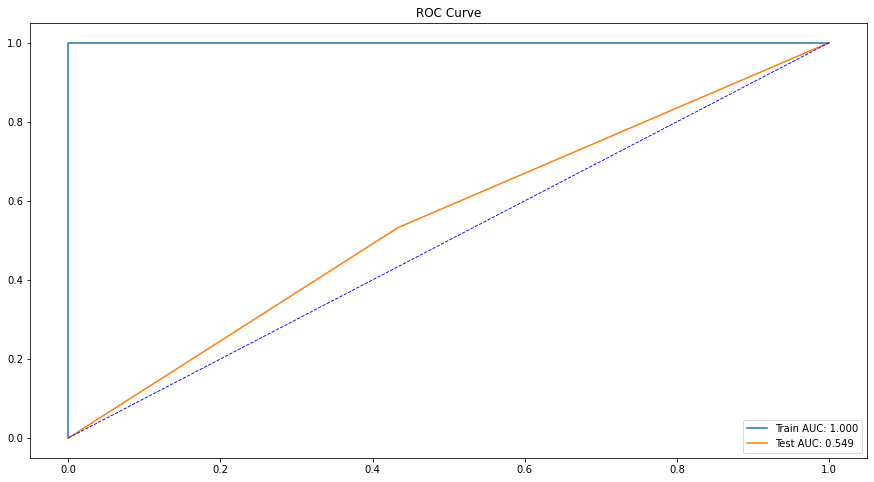

In [48]:
#  Evaluate the model performance
print('confusion_matrix is : ')
cm_2 = metrics.confusion_matrix(y_test, y_pred_dtr) 
print(cm_2)

print('='*100)

accuracy_2 = metrics.accuracy_score(y_test, y_pred_dtr) 
print("Accuracy score:",accuracy_2*100)

precision_2 = metrics.precision_score(y_test, y_pred_dtr) 
print("Precision score:",precision_2*100)

recall_2 = metrics.recall_score(y_test, y_pred_dtr) 
print("Recall score:",recall_2*100)

f1_2 = metrics.f1_score(y_test,y_pred_dtr) 
print("F1 score:",f1_2*100)

roc_auc_2 = roc_auc_score(y_test, predictions_dtr_test)
print('roc_auc_score_2 : ', roc_auc_2*100)

print('='*100)

 # Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test, predictions_dtr_test, target_names = ['NO', 'YES']))

print('='*100)

# calculate ROC
FPR, TPR, LRM = roc_curve(y_train, predictions_dtr_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_dtr_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_dtr = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_dtr)

auc_test_dtr = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_dtr)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_dtr)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_dtr)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

## 3.Random Forest Algorithm

In [49]:
#  Fit Classifier

classifier_3 = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)
classifier_3.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', random_state=0)

In [50]:
# parameters
classifier_3.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [51]:

#  Predict
y_pred_rfr = classifier_3.predict(X_test)

# Generate predictions
predictions_rfr_train =classifier_3.predict(X_train)
predictions_rfr_test= classifier_3.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_3=classifier_3.score(X_train,y_train)          
print('Train_Score : ',train_Acc_3*100)

#ACCURACY = TEST DATA SCORE 
Acc_3=classifier_3.score(X_test, y_test) 
print('Train_Score : ',Acc_3*100)


Train_Score :  100.0
Train_Score :  54.87804878048781


confusion_matrix is : 
[[382 328]
 [338 428]]
Accuracy score: 54.87804878048781
Precision score: 56.613756613756614
Recall score: 55.87467362924282
F1 score: 56.24178712220763
roc_auc_score_3 :  54.83874526532563
classification_report is : 
              precision    recall  f1-score   support

          NO       0.53      0.54      0.53       710
         YES       0.57      0.56      0.56       766

    accuracy                           0.55      1476
   macro avg       0.55      0.55      0.55      1476
weighted avg       0.55      0.55      0.55      1476

[0. 0. 1.] [0. 1. 1.] [2 1 0]
[0.         0.46197183 1.        ] [0.         0.55874674 1.        ] [2 1 0]
Train AUC: 1.000
Test AUC: 0.548


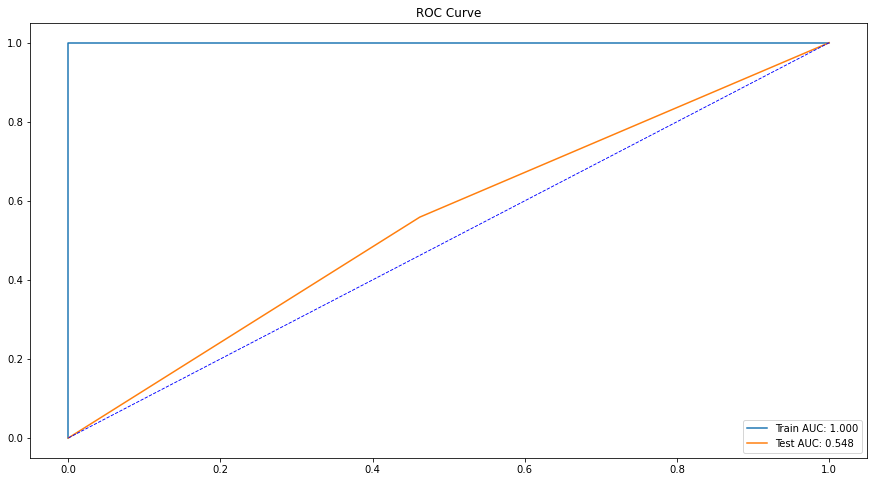

In [52]:
#  Evaluate the model performance
print('confusion_matrix is : ')
cm_3 = metrics.confusion_matrix(y_test, y_pred_rfr) 
print(cm_3)

print('='*100)

accuracy_3 = metrics.accuracy_score(y_test,y_pred_rfr) 
print("Accuracy score:",accuracy_3*100)

precision_3 = metrics.precision_score(y_test,y_pred_rfr) 
print("Precision score:",precision_3*100)

recall_3 = metrics.recall_score(y_test,y_pred_rfr) 
print("Recall score:",recall_3*100)

f1_3 = metrics.f1_score(y_test,y_pred_rfr) 
print("F1 score:",f1_3*100)

roc_auc_3 = roc_auc_score(y_test, predictions_rfr_test)
print('roc_auc_score_3 : ', roc_auc_3*100)

print('='*100)

 # Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test,predictions_rfr_test, target_names = ['NO', 'YES']))

print('='*100)

# calculate ROC
FPR, TPR, LRM = roc_curve(y_train, predictions_rfr_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_rfr_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_rfr = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_rfr)

auc_test_rfr = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_rfr)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_rfr)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_rfr)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

## 4.KNN

In [53]:
# fitting the model

classifier_4 = KNeighborsClassifier(n_neighbors=3)
classifier_4.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [54]:
# parameters
classifier_4.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [55]:

#  Predict
y_pred_knn = classifier_4.predict(X_test)

# Generate predictions
predictions_knn_train =classifier_4.predict(X_train)
predictions_knn_test= classifier_4.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_4=classifier_4.score(X_train,y_train)          
print('Train_Score : ',train_Acc_4*100)

#ACCURACY = TEST DATA SCORE 
Acc_4=classifier_4.score(X_test, y_test) 
print('Test_Score : ',Acc_4*100)


Train_Score :  74.31725740848344
Test_Score :  49.1869918699187


confusion_matrix is : 
[[381 329]
 [421 345]]
Accuracy score: 49.1869918699187
Precision score: 51.18694362017804
Recall score: 45.039164490861616
F1 score: 47.916666666666664
roc_auc_score_3 :  49.35056816092376
classification_report is : 
              precision    recall  f1-score   support

          NO       0.48      0.54      0.50       710
         YES       0.51      0.45      0.48       766

    accuracy                           0.49      1476
   macro avg       0.49      0.49      0.49      1476
weighted avg       0.49      0.49      0.49      1476

[0.         0.24528302 1.        ] [0.         0.73124631 1.        ] [2 1 0]
[0.         0.46338028 1.        ] [0.         0.45039164 1.        ] [2 1 0]
Train AUC: 0.743
Test AUC: 0.494


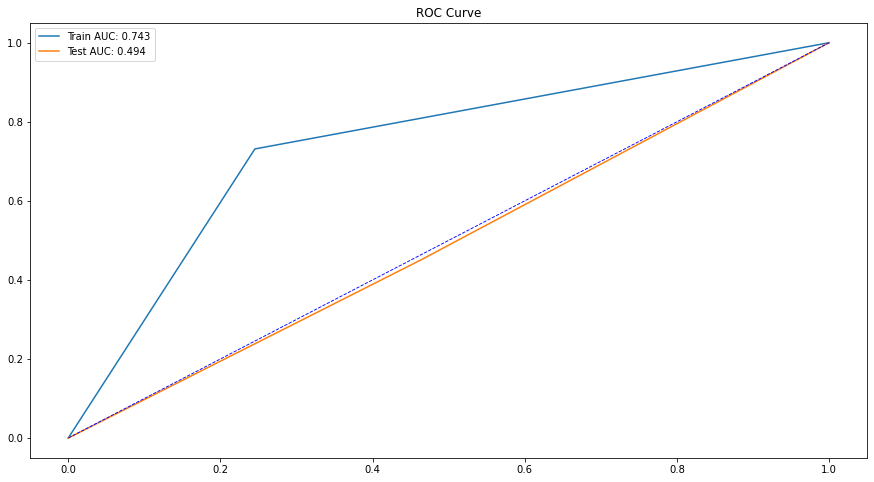

In [56]:
# Evaluate the model performance
print('confusion_matrix is : ')
cm_4 = metrics.confusion_matrix(y_test, y_pred_knn) 
print(cm_4)

print('='*100)

accuracy_4 = metrics.accuracy_score(y_test,y_pred_knn) 
print("Accuracy score:",accuracy_4*100)

precision_4 = metrics.precision_score(y_test,y_pred_knn) 
print("Precision score:",precision_4*100)

recall_4 = metrics.recall_score(y_test,y_pred_knn) 
print("Recall score:",recall_4*100)

f1_4 = metrics.f1_score(y_test,y_pred_knn) 
print("F1 score:",f1_4*100)

roc_auc_4 = roc_auc_score(y_test, predictions_knn_test)
print('roc_auc_score_3 : ', roc_auc_4*100)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test,predictions_knn_test, target_names = ['NO', 'YES']))

print('='*100)

# calculate 
FPR, TPR, LRM = roc_curve(y_train, predictions_knn_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_knn_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_knn = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_knn)

auc_test_knn = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_knn)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_knn)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_knn)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

## 5.SVM

In [57]:
# fitting the model

classifier_5 = svm.SVC()
classifier_5.fit(X_train, y_train)


SVC()

In [58]:
# parameters
classifier_5.get_params(deep=True)

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [59]:
#  Predict
y_pred_svc = classifier_5.predict(X_test)

# Generate predictions
predictions_svc_train =classifier_5.predict(X_train)
predictions_svc_test= classifier_5.predict(X_test)
                                           
#ACCURACY = TRAIN DATA SCORE 
train_Acc_5=classifier_5.score(X_train,y_train)          
print('Train_Score : ',train_Acc_5*100)

#ACCURACY = TEST DATA SCORE 
Acc_5=classifier_5.score(X_test, y_test) 
print('Test_Score : ',Acc_5*100)


Train_Score :  51.539802440441605
Test_Score :  51.42276422764228


confusion_matrix is : 
[[448 262]
 [455 311]]
Accuracy score: 51.42276422764228
Precision score: 54.275741710296685
Recall score: 40.60052219321149
F1 score: 46.452576549663924
roc_auc_score_5 :  51.84955687125363
classification_report is : 
              precision    recall  f1-score   support

          NO       0.50      0.63      0.56       710
         YES       0.54      0.41      0.46       766

    accuracy                           0.51      1476
   macro avg       0.52      0.52      0.51      1476
weighted avg       0.52      0.51      0.51      1476

[0.         0.37164094 1.        ] [0.         0.39870053 1.        ] [2 1 0]
[0.         0.36901408 1.        ] [0.         0.40600522 1.        ] [2 1 0]
Train AUC: 0.514
Test AUC: 0.518


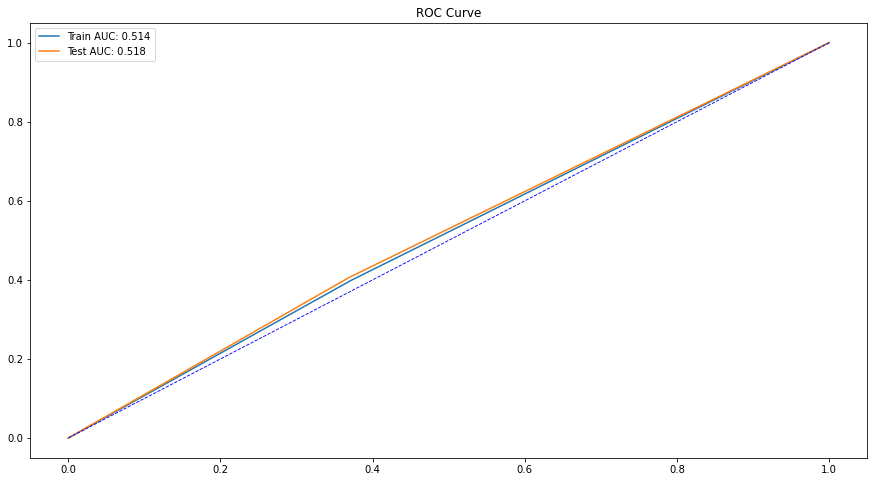

In [60]:
#  Evaluate the model performance
print('confusion_matrix is : ')
cm_5 = metrics.confusion_matrix(y_test, y_pred_svc) 
print(cm_5)

print('='*100)

accuracy_5 = metrics.accuracy_score(y_test,y_pred_svc) 
print("Accuracy score:",accuracy_5*100)

precision_5 = metrics.precision_score(y_test,y_pred_svc) 
print("Precision score:",precision_5*100)

recall_5 = metrics.recall_score(y_test,y_pred_svc) 
print("Recall score:",recall_5*100)

f1_5 = metrics.f1_score(y_test,y_pred_svc) 
print("F1 score:",f1_5*100)

roc_auc_5 = roc_auc_score(y_test, predictions_svc_test)
print('roc_auc_score_5 : ', roc_auc_5*100)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test,predictions_svc_test, target_names = ['NO', 'YES']))

print('='*100)

# calculate 
FPR, TPR, LRM = roc_curve(y_train, predictions_svc_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_svc_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_svc = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_svc)

auc_test_svc = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_svc)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_svc)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_svc)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();


## 6.Gradient Boosting

In [61]:
# fitting the model

classifier_6 = GradientBoostingClassifier()
classifier_6.fit(X_train, y_train)


GradientBoostingClassifier()

In [62]:
# parameters
classifier_6.get_params(deep=True)

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [63]:
# Predict
y_pred_grad = classifier_6.predict(X_test)

# Generate predictions
predictions_grad_train =classifier_6.predict(X_train)
predictions_grad_test= classifier_6.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_6=classifier_6.score(X_train,y_train)          
print('Train_Score : ',train_Acc_6*100)

#ACCURACY = TEST DATA SCORE 
Acc_6=classifier_6.score(X_test, y_test) 
print('Test_Score : ',train_Acc_6*100)



Train_Score :  67.8965717606043
Test_Score :  67.8965717606043


confusion_matrix is : 
[[358 352]
 [287 479]]
Accuracy score: 56.70731707317073
Precision score: 57.64139590854393
Recall score: 62.532637075718014
F1 score: 59.98747651847213
roc_auc_score_6 :  56.47758614349281
classification_report is : 
              precision    recall  f1-score   support

          NO       0.56      0.50      0.53       710
         YES       0.58      0.63      0.60       766

    accuracy                           0.57      1476
   macro avg       0.57      0.56      0.56      1476
weighted avg       0.57      0.57      0.57      1476

[0.         0.38021727 1.        ] [0.         0.74010632 1.        ] [2 1 0]
[0.         0.49577465 1.        ] [0.         0.62532637 1.        ] [2 1 0]
Train AUC: 0.680
Test AUC: 0.565


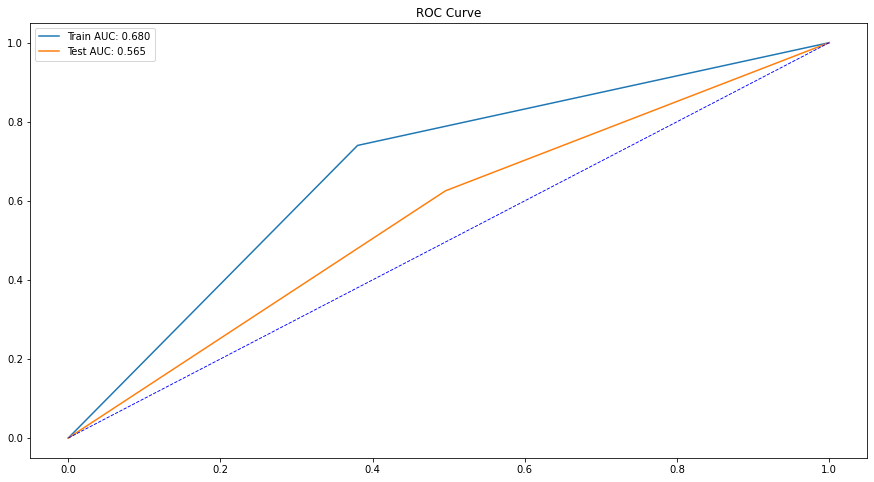

In [64]:
#  Evaluate the model performance
print('confusion_matrix is : ')
cm_6 = metrics.confusion_matrix(y_test, y_pred_grad) 
print(cm_6)

print('='*100)

accuracy_6 = metrics.accuracy_score(y_test,y_pred_grad) 
print("Accuracy score:",accuracy_6*100)

precision_6 = metrics.precision_score(y_test,y_pred_grad) 
print("Precision score:",precision_6*100)

recall_6 = metrics.recall_score(y_test,y_pred_grad) 
print("Recall score:",recall_6*100)

f1_6 = metrics.f1_score(y_test,y_pred_grad) 
print("F1 score:",f1_6*100)

roc_auc_6 = roc_auc_score(y_test, predictions_grad_test)
print('roc_auc_score_6 : ', roc_auc_6*100)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test, predictions_grad_test, target_names = ['NO', 'YES']))

print('='*100)

# calculate 
FPR, TPR, LRM = roc_curve(y_train, predictions_grad_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_grad_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_grad = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_grad)

auc_test_grad = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_grad)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_grad)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_grad)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

## 7.AdaBoosting

In [65]:
# fitting the model

classifier_7 = AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123)
classifier_7.fit(X_train, y_train)



AdaBoostClassifier(learning_rate=0.2, n_estimators=20, random_state=123)

In [66]:
# parameters
classifier_7.get_params(deep=True)

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 0.2,
 'n_estimators': 20,
 'random_state': 123}

In [67]:
#  Predict
y_pred_ada = classifier_7.predict(X_test)

# Generate predictions
predictions_ada_train =classifier_7.predict(X_train)
predictions_ada_test= classifier_7.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_7=classifier_7.score(X_train,y_train)          
print('Train_Score : ',train_Acc_7*100)

#ACCURACY = TEST DATA SCORE 
Acc_7=classifier_7.score(X_test, y_test) 
print('Train_Score : ',Acc_7*100)


Train_Score :  56.15920976176641
Train_Score :  57.18157181571816


confusion_matrix is : 
[[208 502]
 [130 636]]
Accuracy score: 57.18157181571816
Precision score: 55.88752196836555
Recall score: 83.02872062663185
F1 score: 66.80672268907561
roc_auc_score_7 :  56.16224763725959
classification_report is : 
              precision    recall  f1-score   support

          NO       0.62      0.29      0.40       710
         YES       0.56      0.83      0.67       766

    accuracy                           0.57      1476
   macro avg       0.59      0.56      0.53      1476
weighted avg       0.59      0.57      0.54      1476

[0.        0.6969697 1.       ] [0.         0.82870644 1.        ] [2 1 0]
[0.         0.70704225 1.        ] [0.         0.83028721 1.        ] [2 1 0]
Train AUC: 0.566
Test AUC: 0.562


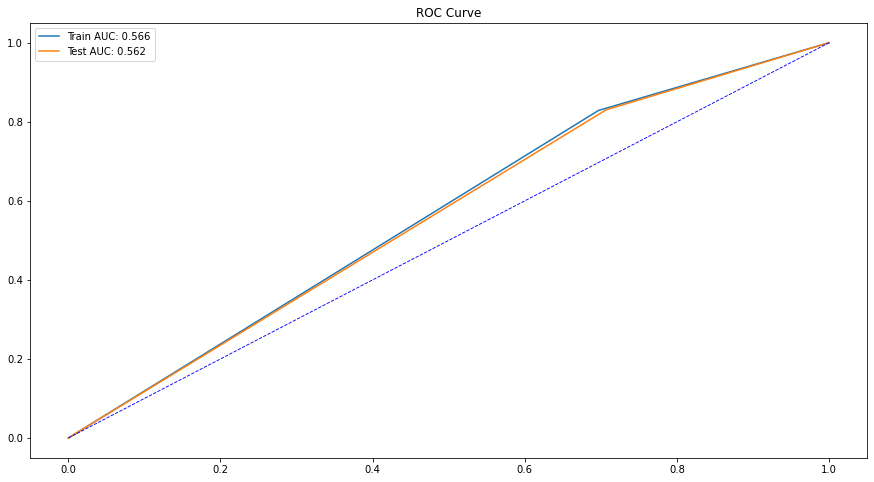

In [68]:
# Evaluate the model performance
print('confusion_matrix is : ')
cm_7 = metrics.confusion_matrix(y_test, y_pred_ada) 
print(cm_7)

print('='*100)

accuracy_7 = metrics.accuracy_score(y_test,y_pred_ada) 
print("Accuracy score:",accuracy_7*100)

precision_7 = metrics.precision_score(y_test,y_pred_ada) 
print("Precision score:",precision_7*100)

recall_7 = metrics.recall_score(y_test,y_pred_ada) 
print("Recall score:",recall_7*100)

f1_7 = metrics.f1_score(y_test,y_pred_ada) 
print("F1 score:",f1_7*100)

roc_auc_7 = roc_auc_score(y_test, y_pred_ada)
print('roc_auc_score_7 : ', roc_auc_7*100)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test, predictions_ada_test, target_names = ['NO', 'YES']))

print('='*100)

# calculate 
FPR, TPR, LRM = roc_curve(y_train, predictions_ada_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_ada_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_ada = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_ada)

auc_test_ada = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_ada)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_ada)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_ada)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

# Comparing Models:

#### 1.Train and Test Scores:-

In [69]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','Random Forest','KNN','SVC','Gradient Boosting','Ada Boosting'],
    'Train_Score': [train_Acc_1, train_Acc_2,train_Acc_3, train_Acc_4, train_Acc_5, train_Acc_6,train_Acc_7],
    'Test_Score': [Acc_1, Acc_2,Acc_3, Acc_4, Acc_5, Acc_6,Acc_7]
})
models.sort_values(by=['Train_Score','Test_Score'], ascending=False)

,Model,Train_Score,Test_Score
1,Decision Tree,1.000000,0.548780
2,Random Forest,1.000000,0.548780
3,KNN,0.743173,0.491870
5,Gradient Boosting,0.678966,0.567073
6,Ada Boosting,0.561592,0.571816
0,Logistic Regression,0.543579,0.530488
4,SVC,0.515398,0.514228


#### 2.Metrics Scores:

In [70]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','Random Forest','KNN','SVC','Gradient Boosting','Ada Boosting'],
    'Precision': [precision_1, precision_2,precision_3, precision_4, precision_5, precision_6,precision_7],
    'Recall': [recall_1, recall_2,recall_3, recall_4, recall_5, recall_6,recall_7],
    'F1_Score': [f1_1,f1_2,f1_3,f1_4,f1_5,f1_6,f1_7],
    'Roc_Score':[roc_auc_1,roc_auc_2,roc_auc_3,roc_auc_4,roc_auc_5,roc_auc_6,roc_auc_7]
})
models.sort_values(by=['Precision','Recall','F1_Score','Roc_Score'], ascending=False)

,Model,Precision,Recall,F1_Score,Roc_Score
5,Gradient Boosting,0.576414,0.625326,0.599875,0.564776
1,Decision Tree,0.569832,0.532637,0.550607,0.549417
2,Random Forest,0.566138,0.558747,0.562418,0.548387
6,Ada Boosting,0.558875,0.830287,0.668067,0.561622
0,Logistic Regression,0.545912,0.566580,0.556054,0.529064
4,SVC,0.542757,0.406005,0.464526,0.518496
3,KNN,0.511869,0.450392,0.479167,0.493506


#### 3.Final Scores:

In [71]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','Random Forest','KNN','SVC','Gradient Boosting','Ada Boosting'],
    'Train_Score': [train_Acc_1, train_Acc_2,train_Acc_3, train_Acc_4, train_Acc_5, train_Acc_6,train_Acc_7],
    'Test_Score': [Acc_1, Acc_2,Acc_3, Acc_4, Acc_5, Acc_6,Acc_7],
    'Precision': [precision_1, precision_2,precision_3, precision_4, precision_5, precision_6,precision_7],
    'Recall': [recall_1, recall_2,recall_3, recall_4, recall_5, recall_6,recall_7],
    'F1_Score': [f1_1,f1_2,f1_3,f1_4,f1_5,f1_6,f1_7],
    'Roc_Score':[roc_auc_1,roc_auc_2,roc_auc_3,roc_auc_4,roc_auc_5,roc_auc_6,roc_auc_7]
})
models.sort_values(by=['Train_Score','Test_Score','Precision','Recall','F1_Score','Roc_Score'], ascending=False)

,Model,Train_Score,Test_Score,Precision,Recall,F1_Score,Roc_Score
1,Decision Tree,1.000000,0.548780,0.569832,0.532637,0.550607,0.549417
2,Random Forest,1.000000,0.548780,0.566138,0.558747,0.562418,0.548387
3,KNN,0.743173,0.491870,0.511869,0.450392,0.479167,0.493506
5,Gradient Boosting,0.678966,0.567073,0.576414,0.625326,0.599875,0.564776
6,Ada Boosting,0.561592,0.571816,0.558875,0.830287,0.668067,0.561622
0,Logistic Regression,0.543579,0.530488,0.545912,0.566580,0.556054,0.529064
4,SVC,0.515398,0.514228,0.542757,0.406005,0.464526,0.518496
